<a href="https://colab.research.google.com/github/apk-bumble/ml-code-open/blob/main/ml-assignment2-ps4-winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from google.colab import files
data_to_load = files.upload()

import io
df = pd.read_csv(io.BytesIO(data_to_load['winequality-red.csv']))

#import io
#df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
# Dataset is now stored in a Pandas Dataframe

# Print two rows from the dataset
print(df.head(2))



Saving winequality-red.csv to winequality-red.csv
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5  


Class Imbalance:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


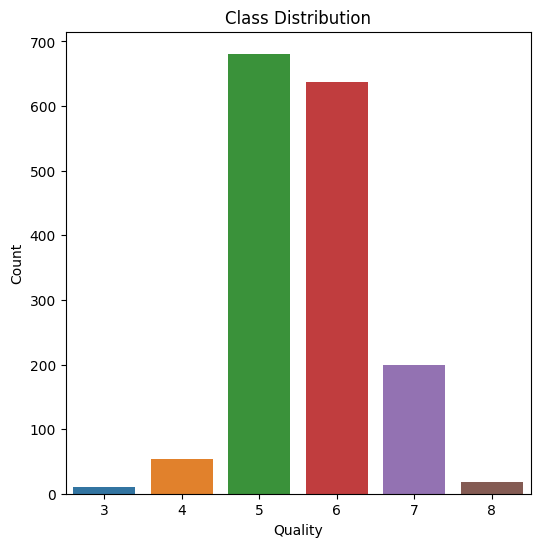

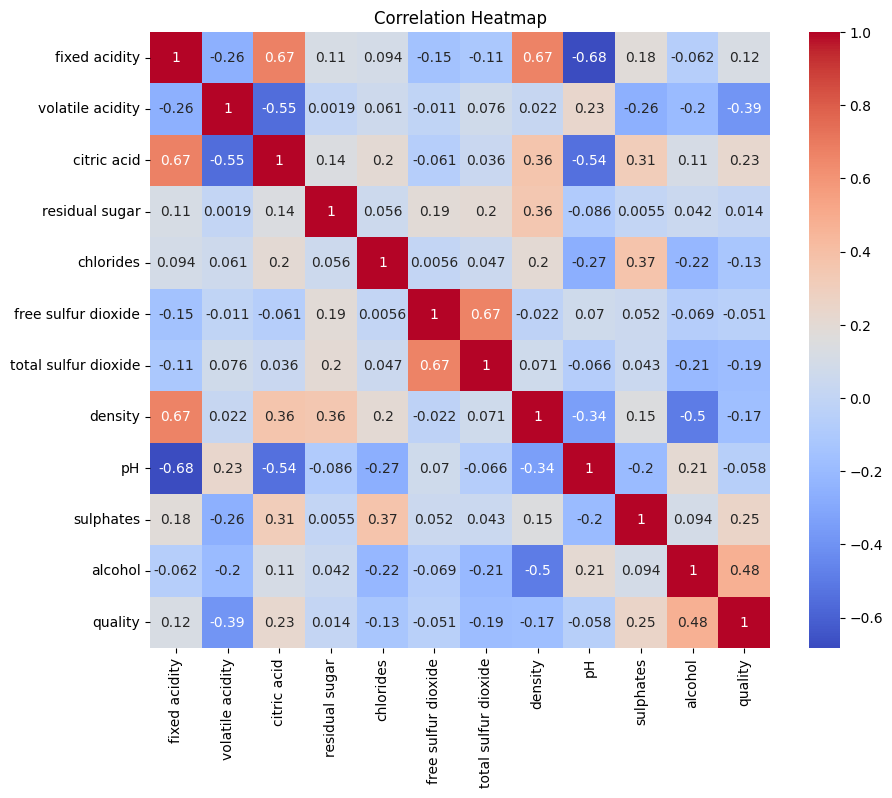

12
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


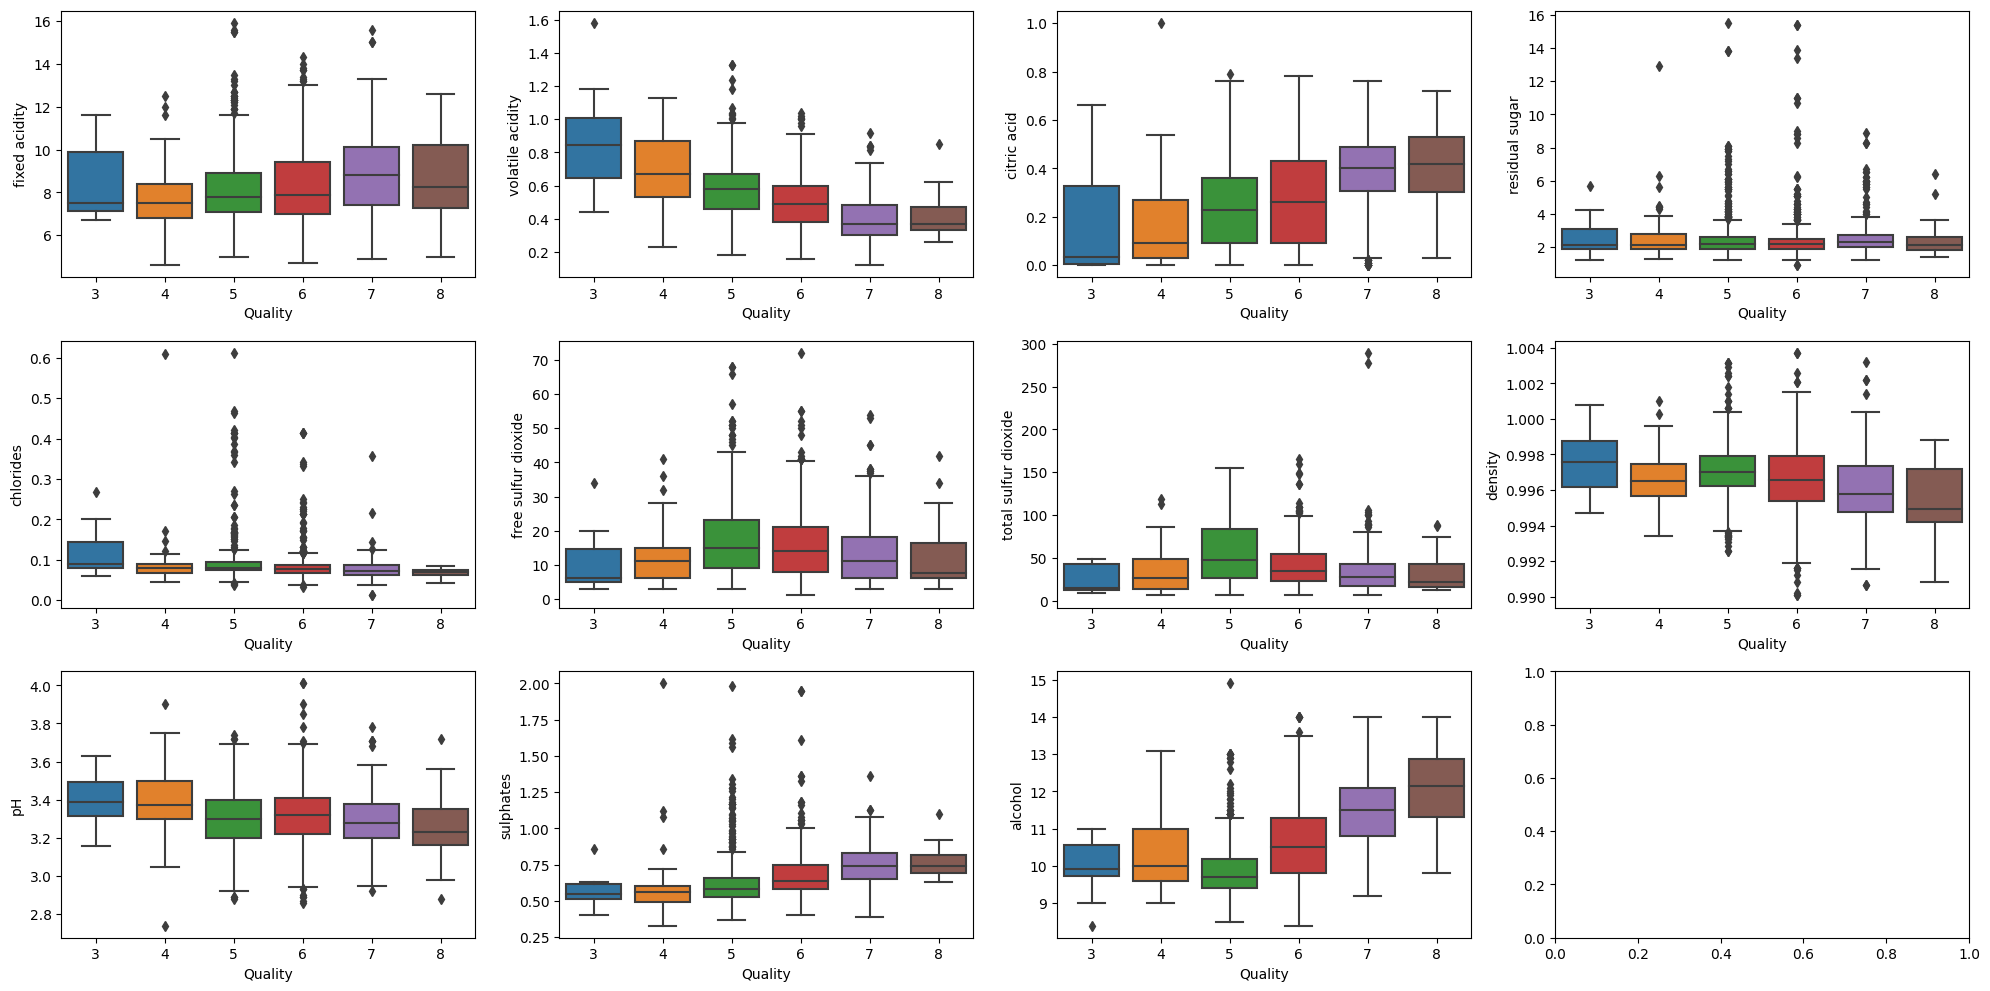

In [35]:
# Comment on Class Imbalance
class_counts = df['quality'].value_counts()
print("Class Imbalance:")
print(class_counts)

# Plot Class Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='quality', data=df)
plt.title("Class Distribution")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Data Visualizations for Insights
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot of Wine Quality vs. Features
feature_columns = df.columns[:-1]
num_features = len(feature_columns)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axes = axes.flatten()
print(len(axes))
print(feature_columns)

for i, feature in enumerate(feature_columns):
    sns.boxplot(x='quality', y=feature, data=df, ax=axes[i])
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [29]:
# Pre-processing Steps
# Identifying NULL or Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling Outliers
# Assuming 'fixed acidity' as an example feature
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['fixed acidity'] = np.where(df['fixed acidity'] < lower_bound, lower_bound, df['fixed acidity'])
df['fixed acidity'] = np.where(df['fixed acidity'] > upper_bound, upper_bound, df['fixed acidity'])

# Handling Skewed Data
# Assuming 'residual sugar' as an example feature
df['residual sugar'] = np.log1p(df['residual sugar'])

# Feature Engineering Techniques
# Feature Transformation Techniques
scaler = StandardScaler()
# scaler = MinMaxScaler()  # Uncomment this line to use Min-Max scaling
scaled_features = scaler.fit_transform(df.drop('quality', axis=1))

# Feature Importance
X = scaled_features
y = df['quality']

# Train a Random Forest classifier to estimate feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Identify important features using feature importances from Random Forest
importances = rf.feature_importances_
feature_names = df.drop('quality', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print feature importance ranking
print("\nFeature Importance Ranking:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]}")

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Feature Importance Ranking:
1. alcohol: 0.15265452181283298
2. sulphates: 0.1128959478210124
3. total sulfur dioxide: 0.10259927744403484
4. volatile acidity: 0.10136808744066067
5. density: 0.09069960297343949
6. chlorides: 0.07738942746980074
7. fixed acidity: 0.07457512707065919
8. pH: 0.07449339314032581
9. residual sugar: 0.07351696680900209
10. citric acid: 0.07320405058261749
11. free sulfur dioxide: 0.06660359743561434


In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and test sets
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classification
# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters found
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_params_rf)

# Evaluate Random Forest model
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

# Random Forest evaluation
rf_report = classification_report(y_test, y_pred_rf, zero_division=0)
print("Random Forest Classification Report:")
print(rf_report)

# Model evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(report_rf)

# KNN Classification
# Hyperparameter tuning using GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters found
best_params_knn = grid_search_knn.best_params_
print("\nBest Hyperparameters (KNN):", best_params_knn)

# Evaluate KNN model
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

# KNN evaluation
knn_report = classification_report(y_test, y_pred_knn, zero_division=0)
print("KNN Classification Report:")
print(knn_report)

# Model evaluation metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("KNN Model Performance:")
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(report_knn)

Best Hyperparameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.77      0.75       130
           6       0.62      0.71      0.66       132
           7       0.60      0.43      0.50        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320

Random Forest Model Performance:
Accuracy: 0.6625
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.77      0.75       130
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best Hyperparameters (KNN): {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
KNN Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.74      0.69       130
           6       0.61      0.67      0.64       132
           7       0.64      0.43      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.63       320
   macro avg       0.32      0.31      0.31       320
weighted avg       0.60      0.63      0.61       320

KNN Model Performance:
Accuracy: 0.63125
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.74      0.69       130
           6       0.61      0.67      0.64       132
           7   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
